### Installing Packages


In [1]:
!pip install torchdata
!pip install -U torchtext==0.13.0
!pip install datasets
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 776.3 MB 17 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.4.1 requires torch==1.12.1, but you have torch 1.12.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 9.7 MB/s 
     |████████████████████████████████| 101 kB 13.8 MB/s 
     |████████████████████████████████| 141 kB 78.5 MB/s 
     |████████████████████████████████| 115 kB 73.4 MB/s 

### Importing Packages

In [2]:
import torch
import torchtext
import datasets

import matplotlib.pyplot as plt
%matplotlib inline

import torch.optim as optim

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Using NLTK Library

I used the nltk package in order to remove stop words (i.e. any, then, etc) from the movie reviews.


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'after', 'can', "you're", "shan't", 'own', 'shouldn', 'an', "you've", 'what', 'off', 'been', 'mustn', "you'll", 'mightn', 'her', 'other', 'few', 'a', "aren't", 'will', "hadn't", 'herself', 'their', 'because', "don't", 'they', 'below', "it's", 'don', 'during', 'ma', "needn't", 'some', 'as', 'this', 'd', 'at', 'until', 'he', 'do', 'than', 'over', 'it', 'by', 'the', 'to', 'all', 'didn', "should've", 'himself', 'up', 'of', 'that', 'once', 'each', 'ourselves', "mightn't", "haven't", 'ours', 'was', 'again', 'where', 'through', 'which', 'how', "didn't", 'there', 'too', 'has', 'from', 'm', 'yours', 'our', 'nor', "hasn't", 'needn', 'whom', 'not', 'on', 'above', 'hers', 'if', 'his', 'yourselves', 'weren', 'wouldn', 'who', 'we', 'or', 'but', 'out', 'myself', 'doesn', 'any', 'most', 'being', 'down', 'about', 'me', 'shan', 'its', 'then', 'isn', 'is', 'between', 'am', 'both', "doesn't", 'just', 're', 'in', 'll', 'o', 'had', 'won', "you'd", 'itself', 've', "wasn't", 'very', "that'll", 's', 'my', 'sh

### Hugging Face Dataset

I used the imdb dataset from the Hugging Face package. This dataset has 25,000 training examples and 25,000 test examples. I also shuffled the dataset because the original dataset has all negative movie reviews listed first and all positive movie reviews listed last, so I wanted to randomize the data for training.

In [6]:
# get dataset from hugging face library
train_data, test_data = datasets.load_dataset('imdb', split = ['train', 'test'])

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
# reshuffle training and test datasets (randomize)
train_data = train_data.shuffle()
test_data = test_data.shuffle()

In [8]:
train_data[:10]

{'label': [1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
 'text': ['Wow, I forgot how great this movie was until I stumbled upon it while looking through the garage. It\'s a kind of strange combination of a bio of Michael Jackson, a collection of musical vignettes, and a story about a super hero fighting to save some little kids. The vignettes are good (especially Speed Demon), but the best part of this movie is the super hero segment, in which Michael Jackson turns into a car, a robot, and finally a spaceship (and it\'s just as weird as it sounds). Joe Pesci is hilarious, and has enough cool imagery and great music to entertain throughout!<br /><br />The real gem however is the incredible "Smooth Criminal" video, which makes the movie worth owning for that part alone!',
  'This is the worst movie I have seen since "I Know Who Killed Me" with Lindsey Lohan. <br /><br />After watching this movie I can assure you that nothing but frustration and disappointment await you should you choose to go see this

### Pre-Processing Data

I first removed stop words from the reviews and then tokenized this data. I then used this tokenized data to create a vocab (with tokens that have min_freq=50). I then created a vector of vocab indexes for the tokens for each review.

In [9]:
from torchtext.data.utils import get_tokenizer

# use a standard english tokenizer
tokenizer = get_tokenizer('basic_english')

# function that tokenizes the data and removes stopwords
def tokenize_data(ex):
    stop_words = set(stopwords.words('english'))
    tokens = tokenizer(ex['text'])
    tokens_without_stopwords = [token for token in tokens if token not in stop_words]
    return {'tokens': tokens_without_stopwords}

train_data = train_data.map(tokenize_data)
test_data = test_data.map(tokenize_data)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [10]:
train_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }))

In [11]:
#Documentation: https://huggingface.co/docs/datasets/v2.4.0/en/package_reference/main_classes#datasets.Dataset.train_test_split
# split the training data into training and validation data
train_valid_data = train_data.train_test_split() # default test_size is 0.25
train_data = train_valid_data['train']
valid_data = train_valid_data['test']

In [12]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 18750
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 6250
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }))

In [13]:
from torchtext.vocab import Vocab, build_vocab_from_iterator

UNK_IDX, PAD_IDX = 0, 1
special_symbols = ['<unk>', '<pad>']

# build vocab from the text tokens from training data
vocab = build_vocab_from_iterator(train_data['tokens'], min_freq = 50, specials = special_symbols)
#vocab = build_vocab_from_iterator(train_data['tokens'], max_tokens = 32, specials = special_symbols)

# set unknown index as the default
vocab.set_default_index(UNK_IDX)

len(vocab)

5731

In [14]:
# save the vocab object
torch.save(vocab, 'LSTM_vocab.pth')

In [15]:
ls

LSTM_vocab.pth  sample_data/


In [15]:
# transform the tokens into numerical values 
def transform_tokens_idxs(ex):
  idxs = {'idxs': [vocab[token] for token in ex['tokens']]}
  return idxs

# add a column with the idxs
train_data = train_data.map(transform_tokens_idxs)
valid_data = valid_data.map(transform_tokens_idxs)
test_data = test_data.map(transform_tokens_idxs)

  0%|          | 0/18750 [00:00<?, ?ex/s]

  0%|          | 0/6250 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [16]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens', 'idxs'],
     num_rows: 18750
 }), Dataset({
     features: ['text', 'label', 'tokens', 'idxs'],
     num_rows: 6250
 }), Dataset({
     features: ['text', 'label', 'tokens', 'idxs'],
     num_rows: 25000
 }))

### Collate into Batches

This will be the collate function to group the data into batches for the dataloader. 

In [17]:
from torch.nn.utils.rnn import pad_sequence

# collate function to put examples in batches 
def collate_batch(batch):
  batch_idxs, batch_labels = [], []

  for b in batch: 
    #print(b)
    batch_idxs.append(torch.LongTensor(b['idxs']))
    batch_labels.append(torch.tensor(b['label']))

  # pad idxs that are shorter than the longest sentence
  batch_idxs = pad_sequence(batch_idxs, batch_first = False, padding_value = PAD_IDX)
  batch_labels = torch.stack(batch_labels)

  batch = {'idxs': batch_idxs,
           'labels': batch_labels}
  
  return batch

### Training an Epoch

This is the basic training model where the indices are passed into the model and the gradients and weights are changed each iteration. Training is done with the Adam optimization algorithm, which is an extension to SGD.

In [18]:
def get_accuracy(predictions, actual_labels):
    batch_size = predictions.shape[0]
    predicted_labels = predictions.argmax(1)
    num_correct = (predicted_labels == actual_labels).sum()
    accuracy = num_correct / batch_size
    return accuracy

In [20]:
GRAD_CLIP = 1

def train(dataloader, model, optimizer, criterion):
    model.train()

    epoch_loss, epoch_accuracy = 0, 0

    for idx, batch in enumerate(dataloader):
        token_ids = batch['idxs'].to(device)
        labels = batch['labels'].to(device)
        model.zero_grad()
        predictions = model(token_ids)
        loss = criterion(predictions, labels)
        accuracy = get_accuracy(predictions, labels)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
        optimizer.step()
        epoch_loss += loss.item()
        epoch_accuracy += accuracy.item()

    return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [19]:
def evaluate(dataloader, model, criterion):
    model.eval()

    epoch_loss, epoch_accuracy = 0, 0

    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            token_ids = batch['idxs'].to(device)
            labels = batch['labels'].to(device)
            predictions = model(token_ids)
            loss = criterion(predictions, labels)
            accuracy = get_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_accuracy += accuracy.item()

    return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [20]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

### LSTM

$$
h_t = \text{LSTM}(E_{[x_t]}), \\
u_t = \text{dropout}(h_t), \\
scores = \text{Linear}(u_t)
$$

In [21]:
# SIMPLE LSTM MODEL
from torch import nn

class RNN(nn.Module):
# I referred to this tutorial for help: https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/1%20-%20Simple%20Sentiment%20Analysis.ipynb
    def __init__(self, vocab_size, emb_dim, hid_dim, output_dim, dropout = 0.5):
        super().__init__()
        # embedding layer
        self.embedding = nn.Embedding(vocab_size, emb_dim)
        # RNN layer
        self.rnn = nn.LSTM(emb_dim, hid_dim) # default batch_first is False
        # dropout
        self.dropout = nn.Dropout(dropout)
        # linear layer 
        self.linear1 = nn.Linear(hid_dim, output_dim)
    def forward(self, text):
        # input text is dimension [seq_len, batch_size]
        # apply embeddings to the words
        #print('text input shape')
        #print(text.shape)
        #lengths = text[0,:]
        #print('lengths')
        #print(lengths)
        seq_len = text.shape[0]
        batch_size = text.shape[1]
        embedded = self.embedding(text)
        #print('embedded shape')
        #print(embedded.shape)
        # embedded is dimension [seq_len, batch_size, emb_dim] because batch_first = False
        # run through RNN
        output, hidden = self.rnn(embedded)
        # hidden[0] is dimension [1, batch_size, hid_dim]
        # get the predictions
        #print('hidden dim')
        #print(hidden[0].shape)
        #print('output before linear (after lstm)')
        #print(output.shape)
        last_output = output[-1]
        last_output = self.dropout(last_output)
        scores = self.linear1(last_output) 
        #print('output after linear')
        #print(output.shape)
        # scores should have the dimension [batch_size, output_dim]
        return scores

### Fine Tuning LSTM Parameters

I tinkered with the parameters and put a comment at the top of the cell of the parameters I was testing out. The final LSTM model with the final parameters chosen is shown at the very bottom of this notebook. 

In [51]:
# with grad clipping and no dropout

# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 21s
train_loss: 0.693, train_acc: 0.495
valid_loss: 0.693, valid_acc: 0.492
Epoch: 02 | Time: 0m 21s
train_loss: 0.693, train_acc: 0.499
valid_loss: 0.693, valid_acc: 0.511
Epoch: 03 | Time: 0m 21s
train_loss: 0.701, train_acc: 0.496
valid_loss: 0.693, valid_acc: 0.510
Epoch: 04 | Time: 0m 21s
train_loss: 0.690, train_acc: 0.503
valid_loss: 0.692, valid_acc: 0.514
Epoch: 05 | Time: 0m 21s
train_loss: 0.684, train_acc: 0.501
valid_loss: 0.694, valid_acc: 0.513
Epoch: 06 | Time: 0m 21s
train_loss: 0.679, train_acc: 0.506
valid_loss: 0.698, valid_acc: 0.512
Epoch: 07 | Time: 0m 21s
train_loss: 0.675, train_acc: 0.512
valid_loss: 0.704, valid_acc: 0.513
Epoch: 08 | Time: 0m 21s
train_loss: 0.672, train_acc: 0.509
valid_loss: 0.714, valid_acc: 0.512
Epoch: 09 | Time: 0m 21s
train_loss: 0.671, train_acc: 0.513
valid_loss: 0.727, valid_acc: 0.512
Epoch: 10 | Time: 0m 21s
train_loss: 0.671, train_acc: 0.513
valid_loss: 0.729, valid_acc: 0.511
Epoch: 11 | Time: 0m 21s
train

KeyboardInterrupt: ignored

Epoch: 01 | Time: 0m 21s
train_loss: 0.695, train_acc: 0.501
valid_loss: 0.694, valid_acc: 0.512
Epoch: 02 | Time: 0m 21s
train_loss: 0.693, train_acc: 0.498
valid_loss: 0.696, valid_acc: 0.512
Epoch: 03 | Time: 0m 21s
train_loss: 0.690, train_acc: 0.500
valid_loss: 0.696, valid_acc: 0.512
Epoch: 04 | Time: 0m 21s
train_loss: 0.685, train_acc: 0.506
valid_loss: 0.701, valid_acc: 0.512
Epoch: 05 | Time: 0m 21s
train_loss: 0.679, train_acc: 0.508
valid_loss: 0.717, valid_acc: 0.512
Epoch: 06 | Time: 0m 21s
train_loss: 0.643, train_acc: 0.590
valid_loss: 0.575, valid_acc: 0.714
Epoch: 07 | Time: 0m 21s
train_loss: 0.409, train_acc: 0.827
valid_loss: 0.340, valid_acc: 0.859
Epoch: 08 | Time: 0m 22s
train_loss: 0.311, train_acc: 0.879
valid_loss: 0.320, valid_acc: 0.868
Epoch: 09 | Time: 0m 22s
train_loss: 0.264, train_acc: 0.901
valid_loss: 0.324, valid_acc: 0.871
Epoch: 10 | Time: 0m 21s
train_loss: 0.235, train_acc: 0.913
valid_loss: 0.339, valid_acc: 0.871
Epoch: 11 | Time: 0m 22s
train

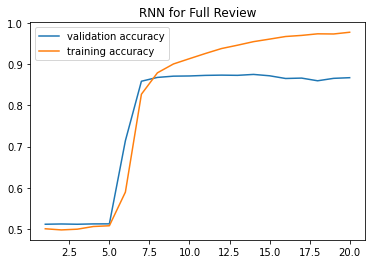

In [53]:
# with grad clipping and dropout = 0.5

# excluding tests for faster runtime and troubleshooting

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 20
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    #test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    #test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    #print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
#plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 33s
train_loss: 0.694, train_acc: 0.497
valid_loss: 0.693, valid_acc: 0.511
test_loss: 0.693, test_acc: 0.502
Epoch: 02 | Time: 0m 32s
train_loss: 0.693, train_acc: 0.497
valid_loss: 0.692, valid_acc: 0.511
test_loss: 0.693, test_acc: 0.501
Epoch: 03 | Time: 0m 33s
train_loss: 0.692, train_acc: 0.499
valid_loss: 0.693, valid_acc: 0.511
test_loss: 0.693, test_acc: 0.503
Epoch: 04 | Time: 0m 33s
train_loss: 0.688, train_acc: 0.500
valid_loss: 0.696, valid_acc: 0.511
test_loss: 0.695, test_acc: 0.503
Epoch: 05 | Time: 0m 33s
train_loss: 0.683, train_acc: 0.504
valid_loss: 0.701, valid_acc: 0.512
test_loss: 0.700, test_acc: 0.503
Epoch: 06 | Time: 0m 33s
train_loss: 0.680, train_acc: 0.506
valid_loss: 0.705, valid_acc: 0.512
test_loss: 0.703, test_acc: 0.504
Epoch: 07 | Time: 0m 33s
train_loss: 0.676, train_acc: 0.510
valid_loss: 0.713, valid_acc: 0.516
test_loss: 0.711, test_acc: 0.507
Epoch: 08 | Time: 0m 33s
train_loss: 0.634, train_acc: 0.587
valid_loss: 0.464, val

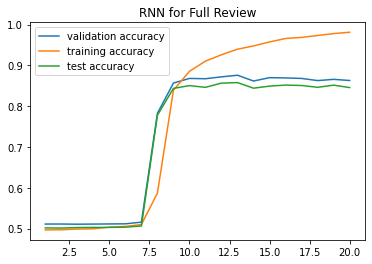

In [60]:
# with grad clipping and dropout = 0.25

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)
DROPOUT = 0.25

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, DROPOUT)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 20
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 32s
train_loss: 0.695, train_acc: 0.496
valid_loss: 0.693, valid_acc: 0.512
test_loss: 0.695, test_acc: 0.501
Epoch: 02 | Time: 0m 33s
train_loss: 0.695, train_acc: 0.497
valid_loss: 0.694, valid_acc: 0.511
test_loss: 0.694, test_acc: 0.501
Epoch: 03 | Time: 0m 32s
train_loss: 0.693, train_acc: 0.496
valid_loss: 0.695, valid_acc: 0.512
test_loss: 0.695, test_acc: 0.502
Epoch: 04 | Time: 0m 33s
train_loss: 0.690, train_acc: 0.501
valid_loss: 0.698, valid_acc: 0.513
test_loss: 0.699, test_acc: 0.501
Epoch: 05 | Time: 0m 33s
train_loss: 0.704, train_acc: 0.499
valid_loss: 0.738, valid_acc: 0.510
test_loss: 0.743, test_acc: 0.502
Epoch: 06 | Time: 0m 33s
train_loss: 0.690, train_acc: 0.503
valid_loss: 0.696, valid_acc: 0.510
test_loss: 0.695, test_acc: 0.502
Epoch: 07 | Time: 0m 33s
train_loss: 0.684, train_acc: 0.505
valid_loss: 0.702, valid_acc: 0.510
test_loss: 0.698, test_acc: 0.503
Epoch: 08 | Time: 0m 33s
train_loss: 0.681, train_acc: 0.504
valid_loss: 0.701, val

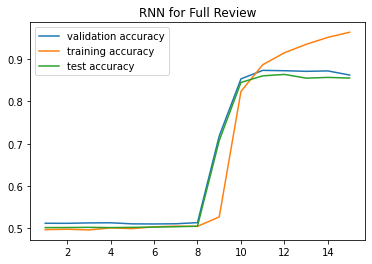

In [62]:
# with grad clipping and dropout = 0.10

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)
DROPOUT = 0.1

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, DROPOUT)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 43s
train_loss: 0.694, train_acc: 0.497
valid_loss: 0.692, valid_acc: 0.517
test_loss: 0.694, test_acc: 0.506
Epoch: 02 | Time: 0m 44s
train_loss: 0.685, train_acc: 0.547
valid_loss: 0.701, valid_acc: 0.715
test_loss: 0.719, test_acc: 0.705
Epoch: 03 | Time: 0m 44s
train_loss: 0.453, train_acc: 0.800
valid_loss: 0.369, valid_acc: 0.862
test_loss: 0.392, test_acc: 0.850
Epoch: 04 | Time: 0m 45s
train_loss: 0.289, train_acc: 0.888
valid_loss: 0.301, valid_acc: 0.882
test_loss: 0.324, test_acc: 0.872
Epoch: 05 | Time: 0m 43s
train_loss: 0.212, train_acc: 0.924
valid_loss: 0.360, valid_acc: 0.878
test_loss: 0.398, test_acc: 0.867
Epoch: 06 | Time: 0m 43s
train_loss: 0.162, train_acc: 0.944
valid_loss: 0.372, valid_acc: 0.876
test_loss: 0.399, test_acc: 0.863
Epoch: 07 | Time: 0m 43s
train_loss: 0.130, train_acc: 0.959
valid_loss: 0.444, valid_acc: 0.870
test_loss: 0.467, test_acc: 0.860
Epoch: 08 | Time: 0m 44s
train_loss: 0.100, train_acc: 0.969
valid_loss: 0.515, val

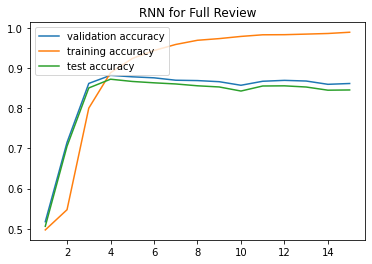

In [63]:
# with grad clipping and dropout = 0.10

from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)
DROPOUT = 0.10

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, DROPOUT)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('RNN for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

### Final LSTM Model

After tinkering with parameters, I settled on the following parameters as the final LSTM Model.

Epoch: 01 | Time: 0m 51s
train_loss: 0.694, train_acc: 0.503
valid_loss: 0.692, valid_acc: 0.500
test_loss: 0.692, test_acc: 0.504
Epoch: 02 | Time: 0m 53s
train_loss: 0.688, train_acc: 0.514
valid_loss: 0.697, valid_acc: 0.508
test_loss: 0.694, test_acc: 0.510
Epoch: 03 | Time: 0m 54s
train_loss: 0.613, train_acc: 0.624
valid_loss: 0.461, valid_acc: 0.786
test_loss: 0.447, test_acc: 0.796
Epoch: 04 | Time: 0m 55s
train_loss: 0.380, train_acc: 0.846
valid_loss: 0.370, valid_acc: 0.845
test_loss: 0.364, test_acc: 0.845
Epoch: 05 | Time: 0m 55s
train_loss: 0.284, train_acc: 0.891
valid_loss: 0.368, valid_acc: 0.861
test_loss: 0.365, test_acc: 0.857
Epoch: 06 | Time: 0m 55s
train_loss: 0.230, train_acc: 0.917
valid_loss: 0.349, valid_acc: 0.864
test_loss: 0.352, test_acc: 0.859
Epoch: 07 | Time: 0m 55s
train_loss: 0.187, train_acc: 0.931
valid_loss: 0.387, valid_acc: 0.863
test_loss: 0.399, test_acc: 0.860
Epoch: 08 | Time: 0m 55s
train_loss: 0.160, train_acc: 0.942
valid_loss: 0.383, val

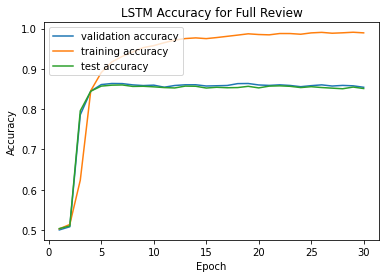

In [26]:
# with grad clipping and dropout = 0.10

from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

INPUT_DIM = len(vocab)
EMBEDDING_DIM = 32
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)
DROPOUT = 0.10

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, DROPOUT)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

# RNN (with vocab min freq = 50 and all examples)
N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []
train_losses = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader, model, optimizer, criterion)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion)
    test_loss, test_acc = evaluate(test_dataloader, model, criterion)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'LSTM-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('LSTM Accuracy for Full Review')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")

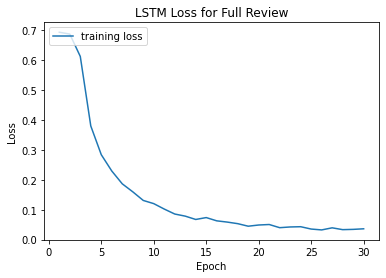

In [27]:
plt.title('LSTM Loss for Full Review')
plt.plot(range(1, N_EPOCHS+1), train_losses, label = 'training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")

In [25]:
model.load_state_dict(torch.load('LSTM-model.pt'))
test_loss, test_acc = evaluate(test_dataloader, model, criterion)
print(f'test_loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

test_loss: 0.352, test_acc: 0.860


### Predictions

In [26]:
model.load_state_dict(torch.load('LSTM-model.pt'))

def predict_label(text, model, vocab):
  labels = ['Negative', 'Positive']

  # put model in eval mode
  model.eval()

  # process input
  stop_words = set(stopwords.words('english'))
  tokens = tokenizer(text)
  tokens_without_stopwords = [token for token in tokens if token not in stop_words]
  idxs = [vocab[token] for token in tokens_without_stopwords]
  idxs = torch.tensor(idxs).to(device)
  # add batch of 1 (dimension)
  idxs = idxs.unsqueeze(1)

  with torch.no_grad():
    scores = model(idxs)

  predicted_label = scores.argmax(1)

  return labels[predicted_label.item()]
  

In [30]:
text_review = 'This movie was soooooooooo bad'
l = predict_label(text_review, model, vocab)
print(l)

Negative


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data
